# Music Analytics (WIP)
Date: 2022-07-15  
#### By: [Eduardo Manotas](www.Linkedin.com/in/eduardo-manotas-1b0b3b1a0)

Description: This notebook is intended to analyze the data from the Spotify API and Youtube and create a model to predict the popularity of a song based on its features.   
This is a work in progress project, feedbacks are greatfully welcome. 

### Imports and data reading

In [1]:
# Libraries import
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") # for production lets ignore alerts.


plt.style.use('ggplot')
pd.set_option('display.max_columns',None)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-o

In [2]:
#Set color palettes for plots
# Paleta de colores verde para Spotify
spotify_palette = sns.light_palette("green", n_colors=10, reverse=True)

# Paleta de colores rojo para YouTube
youtube_palette = sns.light_palette("red", n_colors=10, reverse=True)


In [3]:
# We load the data from a CSV file.
df = pd.read_csv('/kaggle/input/spotify-and-youtube/Spotify_Youtube.csv', index_col=0)

# 1. Data Understanding

In [4]:
#Check first 5 rows
df.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [5]:
#Check columns and their types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20718 entries, 0 to 20717
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Url_spotify       20718 non-null  object 
 2   Track             20718 non-null  object 
 3   Album             20718 non-null  object 
 4   Album_type        20718 non-null  object 
 5   Uri               20718 non-null  object 
 6   Danceability      20716 non-null  float64
 7   Energy            20716 non-null  float64
 8   Key               20716 non-null  float64
 9   Loudness          20716 non-null  float64
 10  Speechiness       20716 non-null  float64
 11  Acousticness      20716 non-null  float64
 12  Instrumentalness  20716 non-null  float64
 13  Liveness          20716 non-null  float64
 14  Valence           20716 non-null  float64
 15  Tempo             20716 non-null  float64
 16  Duration_ms       20716 non-null  float6

## Features Interpretability 
1. Danceability: the ability of the song to invite dancing or movement to the rhythm.
2. Energy: perceived level of energy in the song, indicating how energetic or intense it feels.
3. Key: the tonality of the song, providing an overall sense (e.g., major keys may sound more cheerful, while minor keys may sound more melancholic).
4. Loudness: the overall volume level of the song.
5. Speechiness: the presence of spoken elements in the song, indicating whether it has more vocal elements or instrumental elements.
6. Acousticness: the level of acoustic elements or acoustic instruments present in the song.
7. Instrumentalness: a measure of the presence of instrumental elements in the song rather than vocal elements.
8. Liveness: the perception of whether the song sounds live or was recorded in a studio.
9. Valence: a measure of the perceived positivity or negativity in the song, indicating the joy or sadness it conveys.
10. Tempo: the speed or rhythm of the song, referring to the number of beats per minute (BPM).
11. Duration_ms: the duration of the song in milliseconds.

**** This is very general an subjective, use them as a reference ****

In [6]:
#Numerical columns statistics
df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


# 2. Data Preparation

In [7]:
#Subsetting the data to only include the columns we need 
df = df[['Artist', 
         #'Url_spotify', 
         'Track', 'Album', 'Album_type', 
         #'Uri',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 
       #'Url_youtube', 
       #'Title', 
       #'Channel', 
        'Views', 'Likes',
       'Comments', 
       #'Description', 
       'Licensed', 'official_video', 'Stream']].copy()

In [8]:
#Adjust Official Video and Licensed column to boolean
df['official_video'] = df['official_video'].astype('bool')
df['Licensed'] = df['Licensed'].astype('bool')


In [9]:
#Rename columns to be more readable
df.rename(columns={'official_video':'Official_video', 'Channel':'Channel_name', 'Stream':'Spotify_stream' }, inplace=True)

In [10]:
# Check for null or missing values - not a problem as not representative for the analysis
df.isna().sum()

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Views               470
Likes               541
Comments            569
Licensed              0
Official_video        0
Spotify_stream      576
dtype: int64

In [11]:
# Check for duplicates
df.loc[df.duplicated(subset=['Track', 'Artist'])]

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,Official_video,Spotify_stream
773,Whitney Houston,How Will I Know,Whitney Houston,album,0.832,0.544,6.0,-12.697,0.0442,0.2010,0.000139,0.6320,0.9280,119.490,275533.0,129596945.0,542989.0,20742.0,True,True,246928304.0
1582,Scorpions,Still Loving You,Love At First Sting,album,0.273,0.390,8.0,-12.384,0.0317,0.1340,0.001740,0.1830,0.0851,103.955,387000.0,60836076.0,423418.0,10227.0,False,True,NaN
1583,Scorpions,No One Like You,Comeblack,album,0.601,0.928,7.0,-4.380,0.0481,0.0140,0.000113,0.1510,0.6250,115.999,246533.0,20342346.0,205847.0,4439.0,False,True,52484760.0
1625,"Earth, Wind & Fire",Fantasy,All 'N All,album,0.608,0.745,4.0,-8.772,0.0857,0.3230,0.004280,0.1350,0.6140,88.941,277413.0,641407658.0,4804872.0,305112.0,True,True,23604673.0
1695,Shaggy,It Wasn't Me,It Wasn't Me,single,0.727,0.921,11.0,-3.212,0.0462,0.1260,0.000000,0.0942,0.5080,120.049,178500.0,19973183.0,264679.0,8181.0,False,False,11910849.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17603,Seafret,Atlantis,Atlantis,single,0.431,0.802,8.0,-2.665,0.0472,0.0333,0.000000,0.3520,0.4720,101.932,198824.0,67914683.0,976184.0,9553.0,True,True,2398377.0
18133,Shiloh Dynasty,Losing Interest,Losing Interest,single,0.960,0.360,10.0,-16.192,0.1550,0.6730,0.017700,0.2930,0.6390,114.927,136696.0,49040841.0,1026753.0,25034.0,False,False,54312163.0
19010,Soolking,Suavemente,Suavemente,single,0.854,0.682,7.0,-5.212,0.0530,0.3350,0.000926,0.0569,0.5070,140.019,157714.0,196768035.0,1463225.0,31249.0,False,False,33799266.0
19074,Beret,Vuelve,Prisma,album,0.706,0.478,11.0,-6.962,0.1540,0.6090,0.000000,0.1150,0.3300,78.528,153050.0,386064829.0,2740799.0,75858.0,True,True,92889214.0


In [12]:
# Quick look at the data for duplicates, but we will not drop them as they are not true duplicates
df.query('Track == "How Will I Know"')

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,Official_video,Spotify_stream
772,Whitney Houston,How Will I Know,I Wanna Dance With Somebody (The Movie: Whitne...,album,0.758,0.683,6.0,-5.465,0.0399,0.153,0.000002,0.242,0.663,119.001,213295.0,129596945.0,542989.0,20742.0,True,True,79724836.0
773,Whitney Houston,How Will I Know,Whitney Houston,album,0.832,0.544,6.0,-12.697,0.0442,0.201,0.000139,0.632,0.928,119.490,275533.0,129596945.0,542989.0,20742.0,True,True,246928304.0
15531,Clean Bandit,How Will I Know,I Wanna Dance With Somebody (The Movie: Whitne...,album,0.758,0.683,6.0,-5.465,0.0399,0.153,0.000002,0.242,0.663,119.001,213295.0,8472743.0,103099.0,2137.0,True,True,79724836.0


# 3. Exploratory Data Analysis

## 3.1. Uni-variate Analysis

In [13]:
#Check columns
df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes',
       'Comments', 'Licensed', 'Official_video', 'Spotify_stream'],
      dtype='object')

In [14]:
#Import for Data tickers
import matplotlib.ticker as ticker

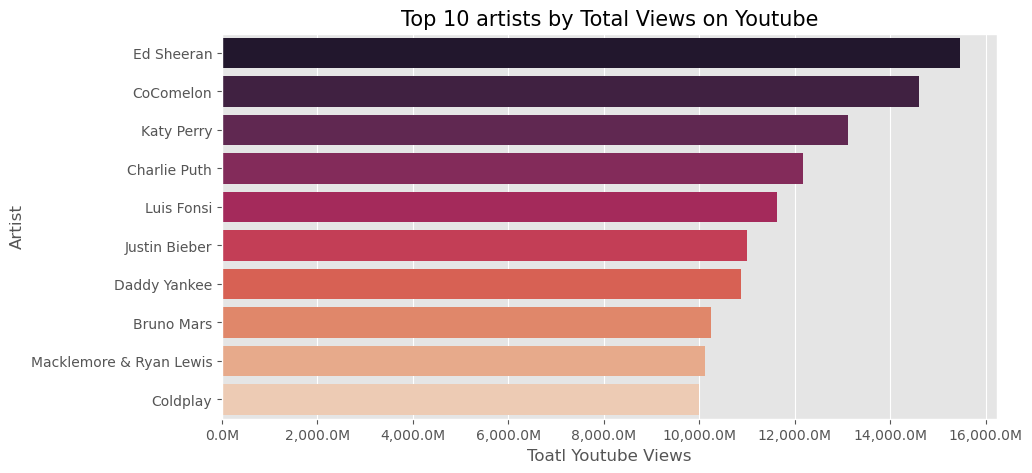

In [15]:
#Top 10 artists by Total Views on Youtube
# Group sort and select the top 10
data = df.groupby('Artist')['Views'].sum().sort_values(ascending=False).head(10)

# plot the data
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=data.values, y=data.index, orient='h', ax=ax, palette='rocket')

# X axis formatting to be in millions
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}M'.format(x*1e-6)))
ax.set_title('Top 10 artists by Total Views on Youtube', fontsize=15)
ax.set_xlabel('Toatl Youtube Views', fontsize=12)

plt.show()

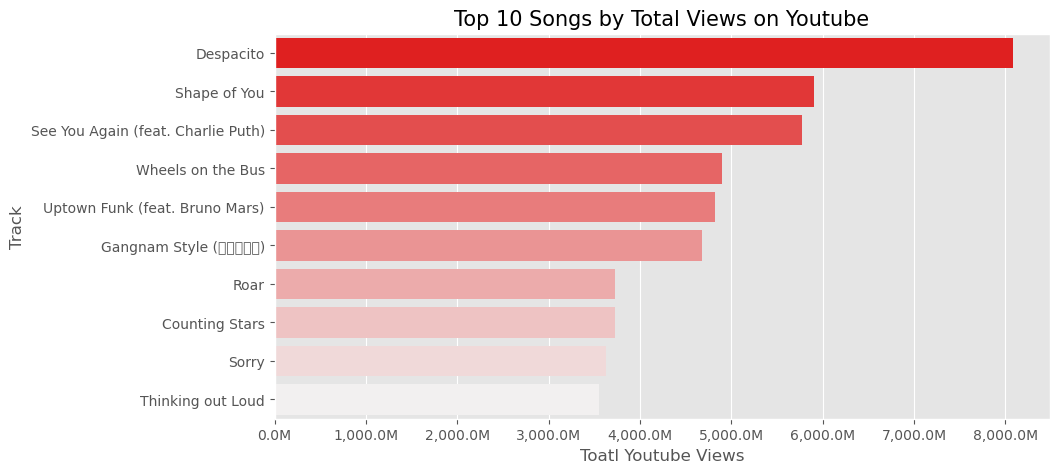

In [16]:
#Top 10 songs by Total Views on Youtube
# Group sort and select the top 10
data = df.groupby('Track')['Views'].mean().sort_values(ascending=False).head(10)

# plot the data
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=data.values, y=data.index, orient='h', ax=ax, palette=youtube_palette)

# X axis formatting to be in millions
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}M'.format(x*1e-6)))
ax.set_title('Top 10 Songs by Total Views on Youtube', fontsize=15)
ax.set_xlabel('Toatl Youtube Views', fontsize=12)
warnings.filterwarnings('ignore', category=UserWarning) # To ignore the warning for the x axis (Gangnam Style)
plt.show()

Text(0.5, 0, 'Toatl Youtube Views')

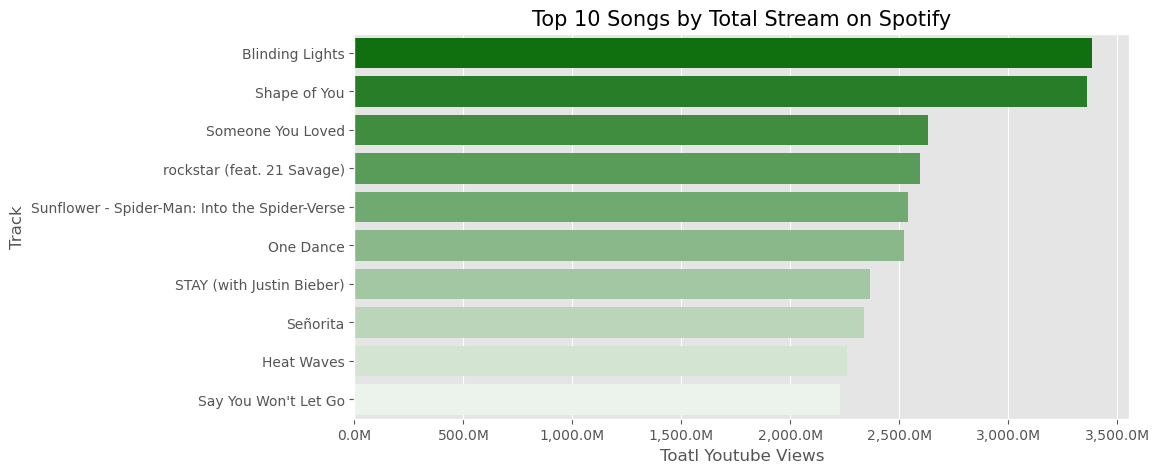

In [17]:
#Top 10 songs by Total Streams on Spotify stream
# Group sort and select the top 10
data = df.groupby('Track')['Spotify_stream'].mean().sort_values(ascending=False).head(10) # here we use mean as we might have multiple rows for the same song (Albums, Remixes, etc.)

# plot the data
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=data.values, y=data.index, orient='h', ax=ax, palette=spotify_palette)

# X axis formatting to be in millions
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}M'.format(x*1e-6)))
ax.set_title('Top 10 Songs by Total Stream on Spotify', fontsize=15)
ax.set_xlabel('Toatl Youtube Views', fontsize=12)

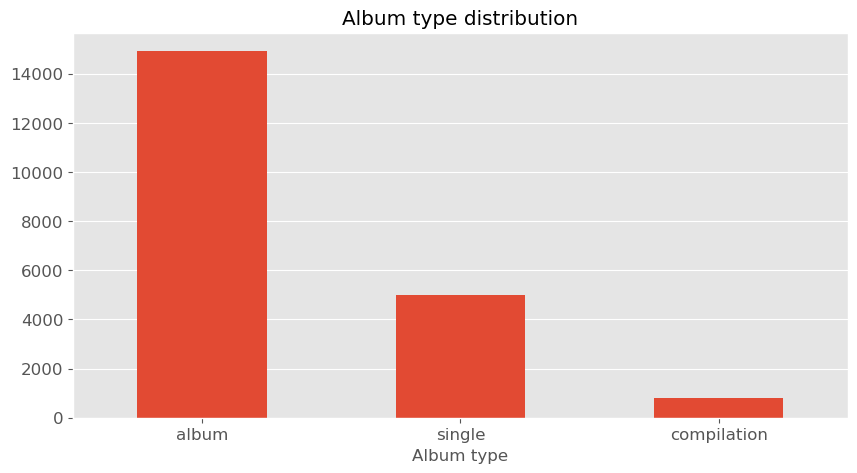

In [18]:
#Album type distribution
at = df['Album_type'].value_counts().plot(kind='bar', 
                                     title='Album type distribution',
                                     figsize=(10,5),
                                     fontsize=12,
                                     rot=0)
at.set_xlabel('Album type', fontsize=12)
at.grid(axis='x')

Text(0.5, 0, 'Danceability')

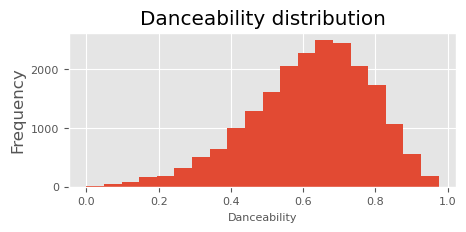

In [19]:
#Tracks danceability distribution
d = df['Danceability'].plot(kind='hist'
                            ,bins=20
                            ,title='Danceability distribution'
                            ,figsize=(5,2)
                            ,fontsize=8)
d.set_xlabel('Danceability', fontsize=8)


Text(0.5, 0, 'Danceability')

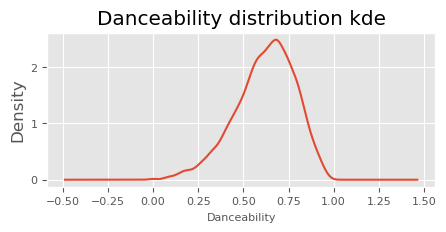

In [20]:
#Tracks danceability distribution
d = df['Danceability'].plot(kind='kde'
                            ,title='Danceability distribution kde'
                            ,figsize=(5,2)
                            ,fontsize=8)
d.set_xlabel('Danceability', fontsize=8)

### 3.1.1 Exploring with new Features 

In [21]:
# Create a df without null value as they are not representative for the analysis
df_completed = df.dropna().copy()

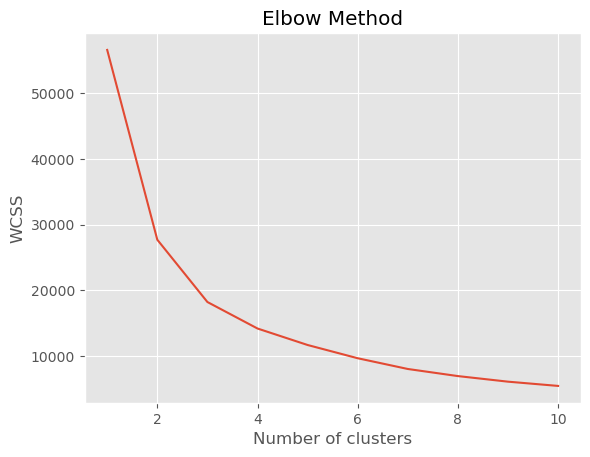

In [22]:
#Clustering using PCA and KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select only the numeric columns
num_cols = df_completed.select_dtypes(include=['int64', 'float64']).columns

# Standardize the features
scaler = StandardScaler()
df_completed_scaled = scaler.fit_transform(df_completed[['Spotify_stream','Views','Likes']])

# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_completed_scaled)

# Determine the number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(principalComponents)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [23]:
# From the previous elbow chart we can see that a good number of clusters is 6
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
df_completed['popularity_cluster'] = kmeans.fit_predict(principalComponents)

In [24]:
#Check the clusters distribution by Spotify stream mean
df_completed['Spotify_stream'].groupby(df_completed['popularity_cluster']).mean()/ 1e6 # in millions


popularity_cluster
0     357.547871
1    1234.957739
2    1204.780242
3      54.197951
4     373.008650
5    1883.542169
Name: Spotify_stream, dtype: float64

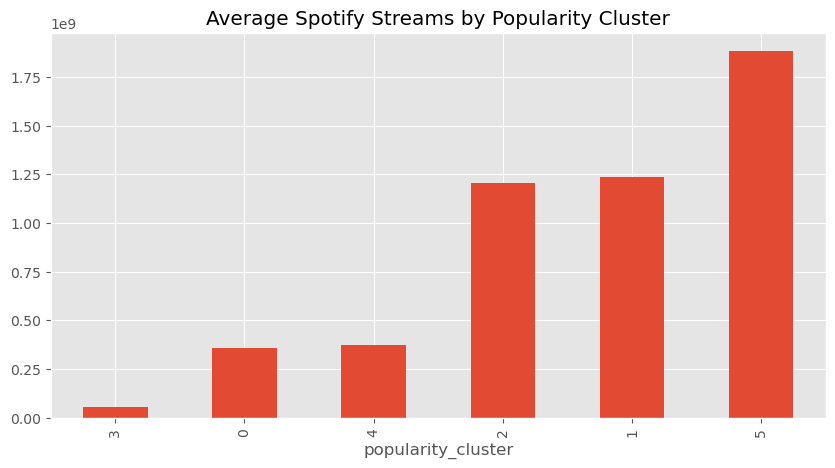

In [25]:
#Plot the clusters distribution by Spotify stream mean
df_completed.groupby('popularity_cluster')['Spotify_stream'].mean().sort_values().plot(kind='bar'
                                                                     , figsize=(10,5)
                                                                     , title='Average Spotify Streams by Popularity Cluster'
                                                                     )
plt.show()

In [26]:
# Create a dictionary with  the cluster names for the legend
name_mapper = {5: 'SuperPopular', 1: 'High-popularity', 2: 'High-popularity', 0:'Medium-popularity', 4:'Medium-popularity', 3:'Low-popularity'}
# Use the map to create a new column with the new group names
df_completed['popularity_group'] = df_completed['popularity_cluster'].map(name_mapper)

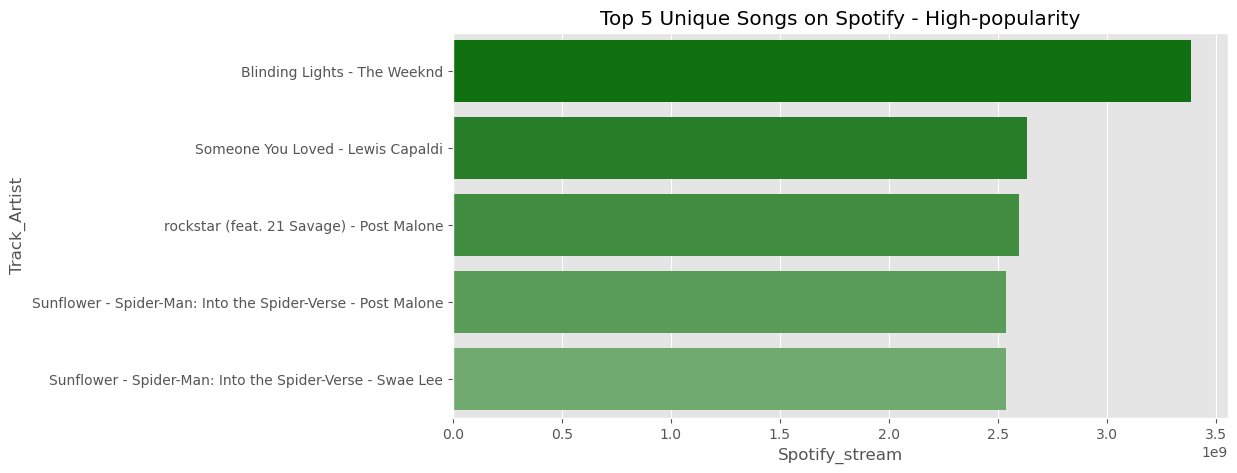

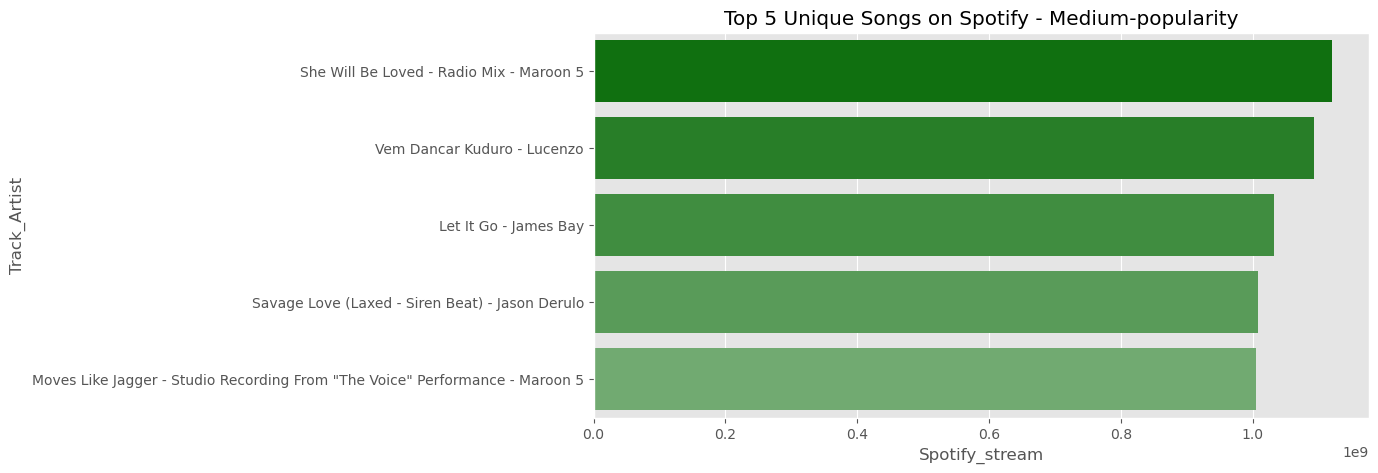

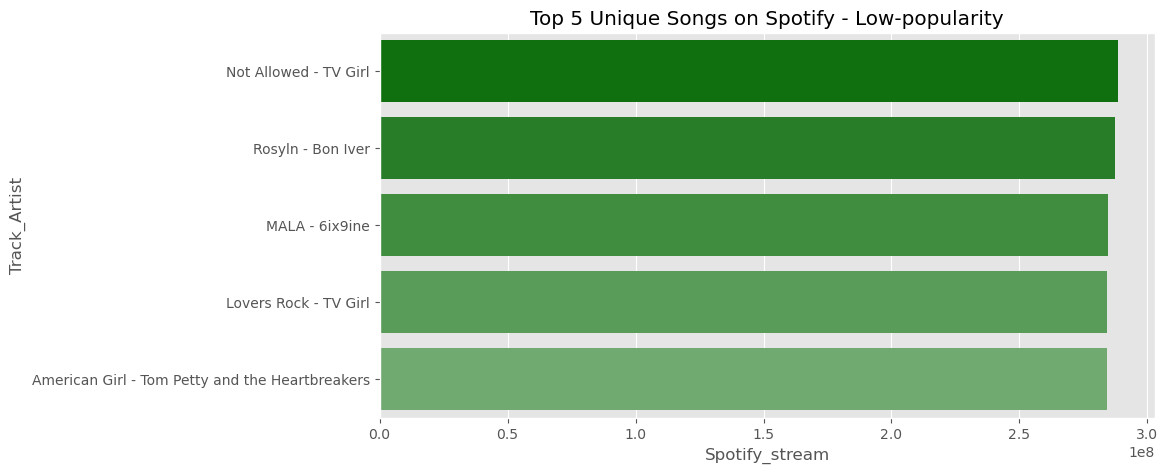

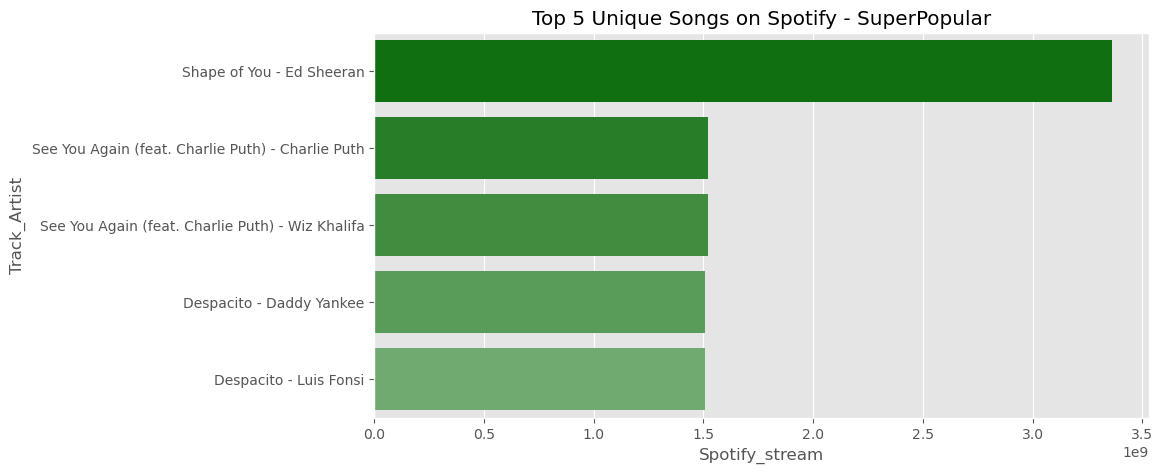

In [27]:
# Plot Top 5 Unique Songs on Spotify by Popularity Group
for group in df_completed['popularity_group'].unique():
    data = df_completed[df_completed['popularity_group'] == group].copy()
    data['Track_Artist'] = data['Track'] + ' - ' + data['Artist']
    data = data.groupby('Track_Artist').Spotify_stream.max().sort_values(ascending=False).head(5).reset_index()
    plt.figure(figsize=(10,5))
    ax = sns.barplot(x='Spotify_stream', y='Track_Artist', data=data, palette=spotify_palette)
    plt.title(f'Top 5 Unique Songs on Spotify - {group}')
    plt.show()


### Quick table view by popularity cluster

In [28]:
# Let's check the mean by group of populatiry and its features 

# Columns that are not to be melted
id_vars = ['Artist', 'Track', 'Album', 'Album_type', 'Licensed', 'Official_video', 'popularity_cluster', 'popularity_group']

groups_ordered = ['Low-popularity', 'Medium-popularity', 'High-popularity','SuperPopular']


# Melt the dataframe
df_melted = pd.melt(df_completed, id_vars=id_vars, var_name='feature', value_name='value')

# Group by 'popularity_group' and 'feature', and calculate the mean
df_pivot = df_melted.groupby(['popularity_group', 'feature'])['value'].mean().unstack()

# Reindex the DataFrame to have an easier comparable visual
df_pivot = df_pivot.reindex(groups_ordered)

df_pivot_styled = df_pivot.style.format("{:.2f}").background_gradient(cmap='BuGn')
df_pivot_styled



feature,Acousticness,Comments,Danceability,Duration_ms,Energy,Instrumentalness,Key,Likes,Liveness,Loudness,Speechiness,Spotify_stream,Tempo,Valence,Views
popularity_group,,,,,,,,,,,,,,,
Low-popularity,0.31,6705.51,0.61,224465.90,0.63,0.06,5.29,201021.41,0.19,-7.95,0.10,54197950.53,120.46,0.53,27314486.94
Medium-popularity,0.23,72635.54,0.65,226417.12,0.67,0.02,5.32,1837500.80,0.18,-6.36,0.10,360297525.52,121.46,0.53,265706042.97
High-popularity,0.20,353137.14,0.67,218746.40,0.67,0.01,5.27,7024887.28,0.18,-5.89,0.09,1213489556.23,119.75,0.52,1009998199.58
SuperPopular,0.34,2778120.00,0.70,230297.00,0.64,0.00,5.00,42584070.00,0.07,-5.55,0.11,1883542168.60,122.38,0.64,6723058061.20


In [29]:
# Lets understand how the artis play with the previous mean, imagine this is like how the song moves above or below from the mean.

# Group by 'popularity_group' and 'feature', and calculate the standa deviation
df_pivot = df_melted.groupby(['popularity_group', 'feature'])['value'].std().unstack()

# Reindex the DataFrame to have an easier comparable visual
df_pivot = df_pivot.reindex(groups_ordered)

df_pivot_styled = df_pivot.style.format("{:.2f}").background_gradient(cmap='BuGn')
df_pivot_styled

feature,Acousticness,Comments,Danceability,Duration_ms,Energy,Instrumentalness,Key,Likes,Liveness,Loudness,Speechiness,Spotify_stream,Tempo,Valence,Views
popularity_group,,,,,,,,,,,,,,,
Low-popularity,0.29,17196.57,0.17,138456.39,0.22,0.21,3.57,311804.88,0.17,4.90,0.11,54691187.77,29.73,0.25,46212264.58
Medium-popularity,0.24,165007.32,0.15,58386.03,0.18,0.09,3.60,1675578.85,0.15,2.87,0.09,195581032.83,29.53,0.23,269261803.57
High-popularity,0.22,998669.59,0.14,45620.14,0.17,0.04,3.72,5129165.22,0.14,2.18,0.08,429424234.53,26.68,0.23,850843105.74
SuperPopular,0.16,1406373.51,0.07,1911.40,0.16,0.00,4.58,8360445.80,0.01,1.90,0.04,826518447.99,51.13,0.32,1239610188.12


### 3.2 Data Analysis using Data profiling

This is a nice way to explore your dataset really quick and start getting nice insights.    
(For performance reasons, plese check the html file on the outputs)

In [30]:
#Dictionary for data types
data_types = {'Artist': 'categorical','Album':'categorical'}

In [31]:
#Generate a data profile report to speed up the EDA process
profile = ProfileReport(df, title='Pandas Profiling Report'
                        ,type_schema=data_types)

In [32]:
#Profile to html
profile.to_file("music_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 3.2. Multi-variate Analysis

In [33]:
#Radio plot for clusters multi-dimensional analysis
import numpy as np
from sklearn.preprocessing import StandardScaler

# Select the numeric columns
num_cols = df_completed.select_dtypes(include=['int64', 'float64']).columns
# Remove the columns that we use to create the groups
num_cols = num_cols.drop(['Spotify_stream', 'Comments', 'Likes', 'Views'])

# Create the scaler
scaler = StandardScaler()

# Fit and transform the numeric columns
df_scaled = pd.DataFrame(scaler.fit_transform(df_completed[num_cols]), columns=num_cols)

# Add the 'Popularity_cat' column to the standardized DataFrame
df_scaled['popularity_group'] = df_completed['popularity_group']

import plotly.graph_objects as go

# Create a list of traces for each popularity_group
traces = []
for cat in df_scaled['popularity_group'].unique():
    data = df_scaled[df_scaled['popularity_group'] == cat][num_cols].mean().tolist()
    trace = go.Scatterpolar(
        r=data + data[:1],
        theta=num_cols.tolist() + [num_cols[0]],
        fill='toself',
        name=cat
    )
    traces.append(trace)

# Create the layout
layout = go.Layout(
    polar=dict(
        radialaxis=dict(visible=True),
    ),
    showlegend=True,
    title='Features Radar Plot by Popularity Group '
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Show the figure
fig.show()

In [34]:
#Save the Df  to a csv file as the data is clean and ready for the analysis and use in an app
df_completed_all_columns = df_completed.copy()
df_completed_all_columns.to_csv('spotify_youtube_df_completed.csv', index=False)

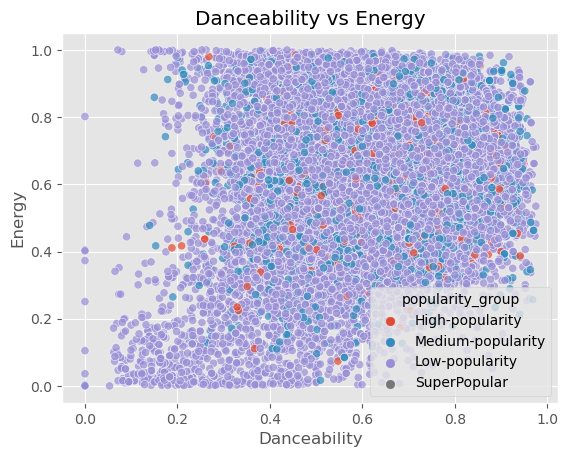

In [35]:
#Simple scatter plot (Danceability vs Energy) - we can see that there is a positive correlation between the two variables
ax = sns.scatterplot(data=df_completed, x='Danceability', y='Energy', hue='popularity_group', alpha=0.7)
ax.set_title('Danceability vs Energy')
plt.show()

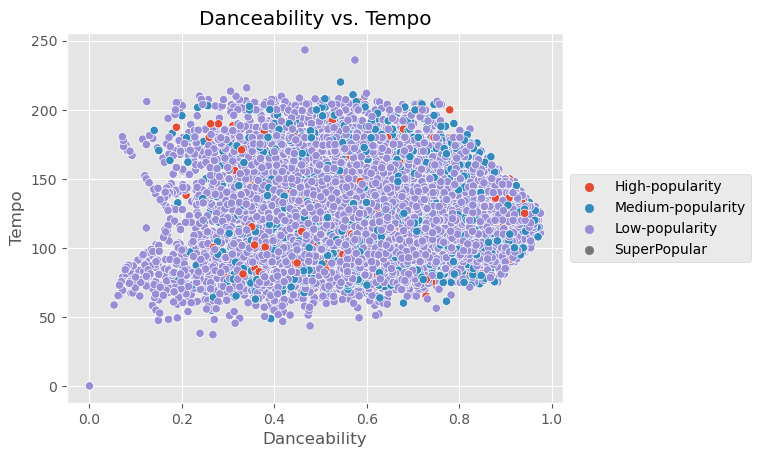

In [36]:
# Spotify stream vs. Valence (positivity), by Album type
ax = sns.scatterplot(data=df_completed,
                x="Danceability",
                y="Tempo",
                hue="popularity_group")
ax.set_title('Danceability vs. Tempo')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()

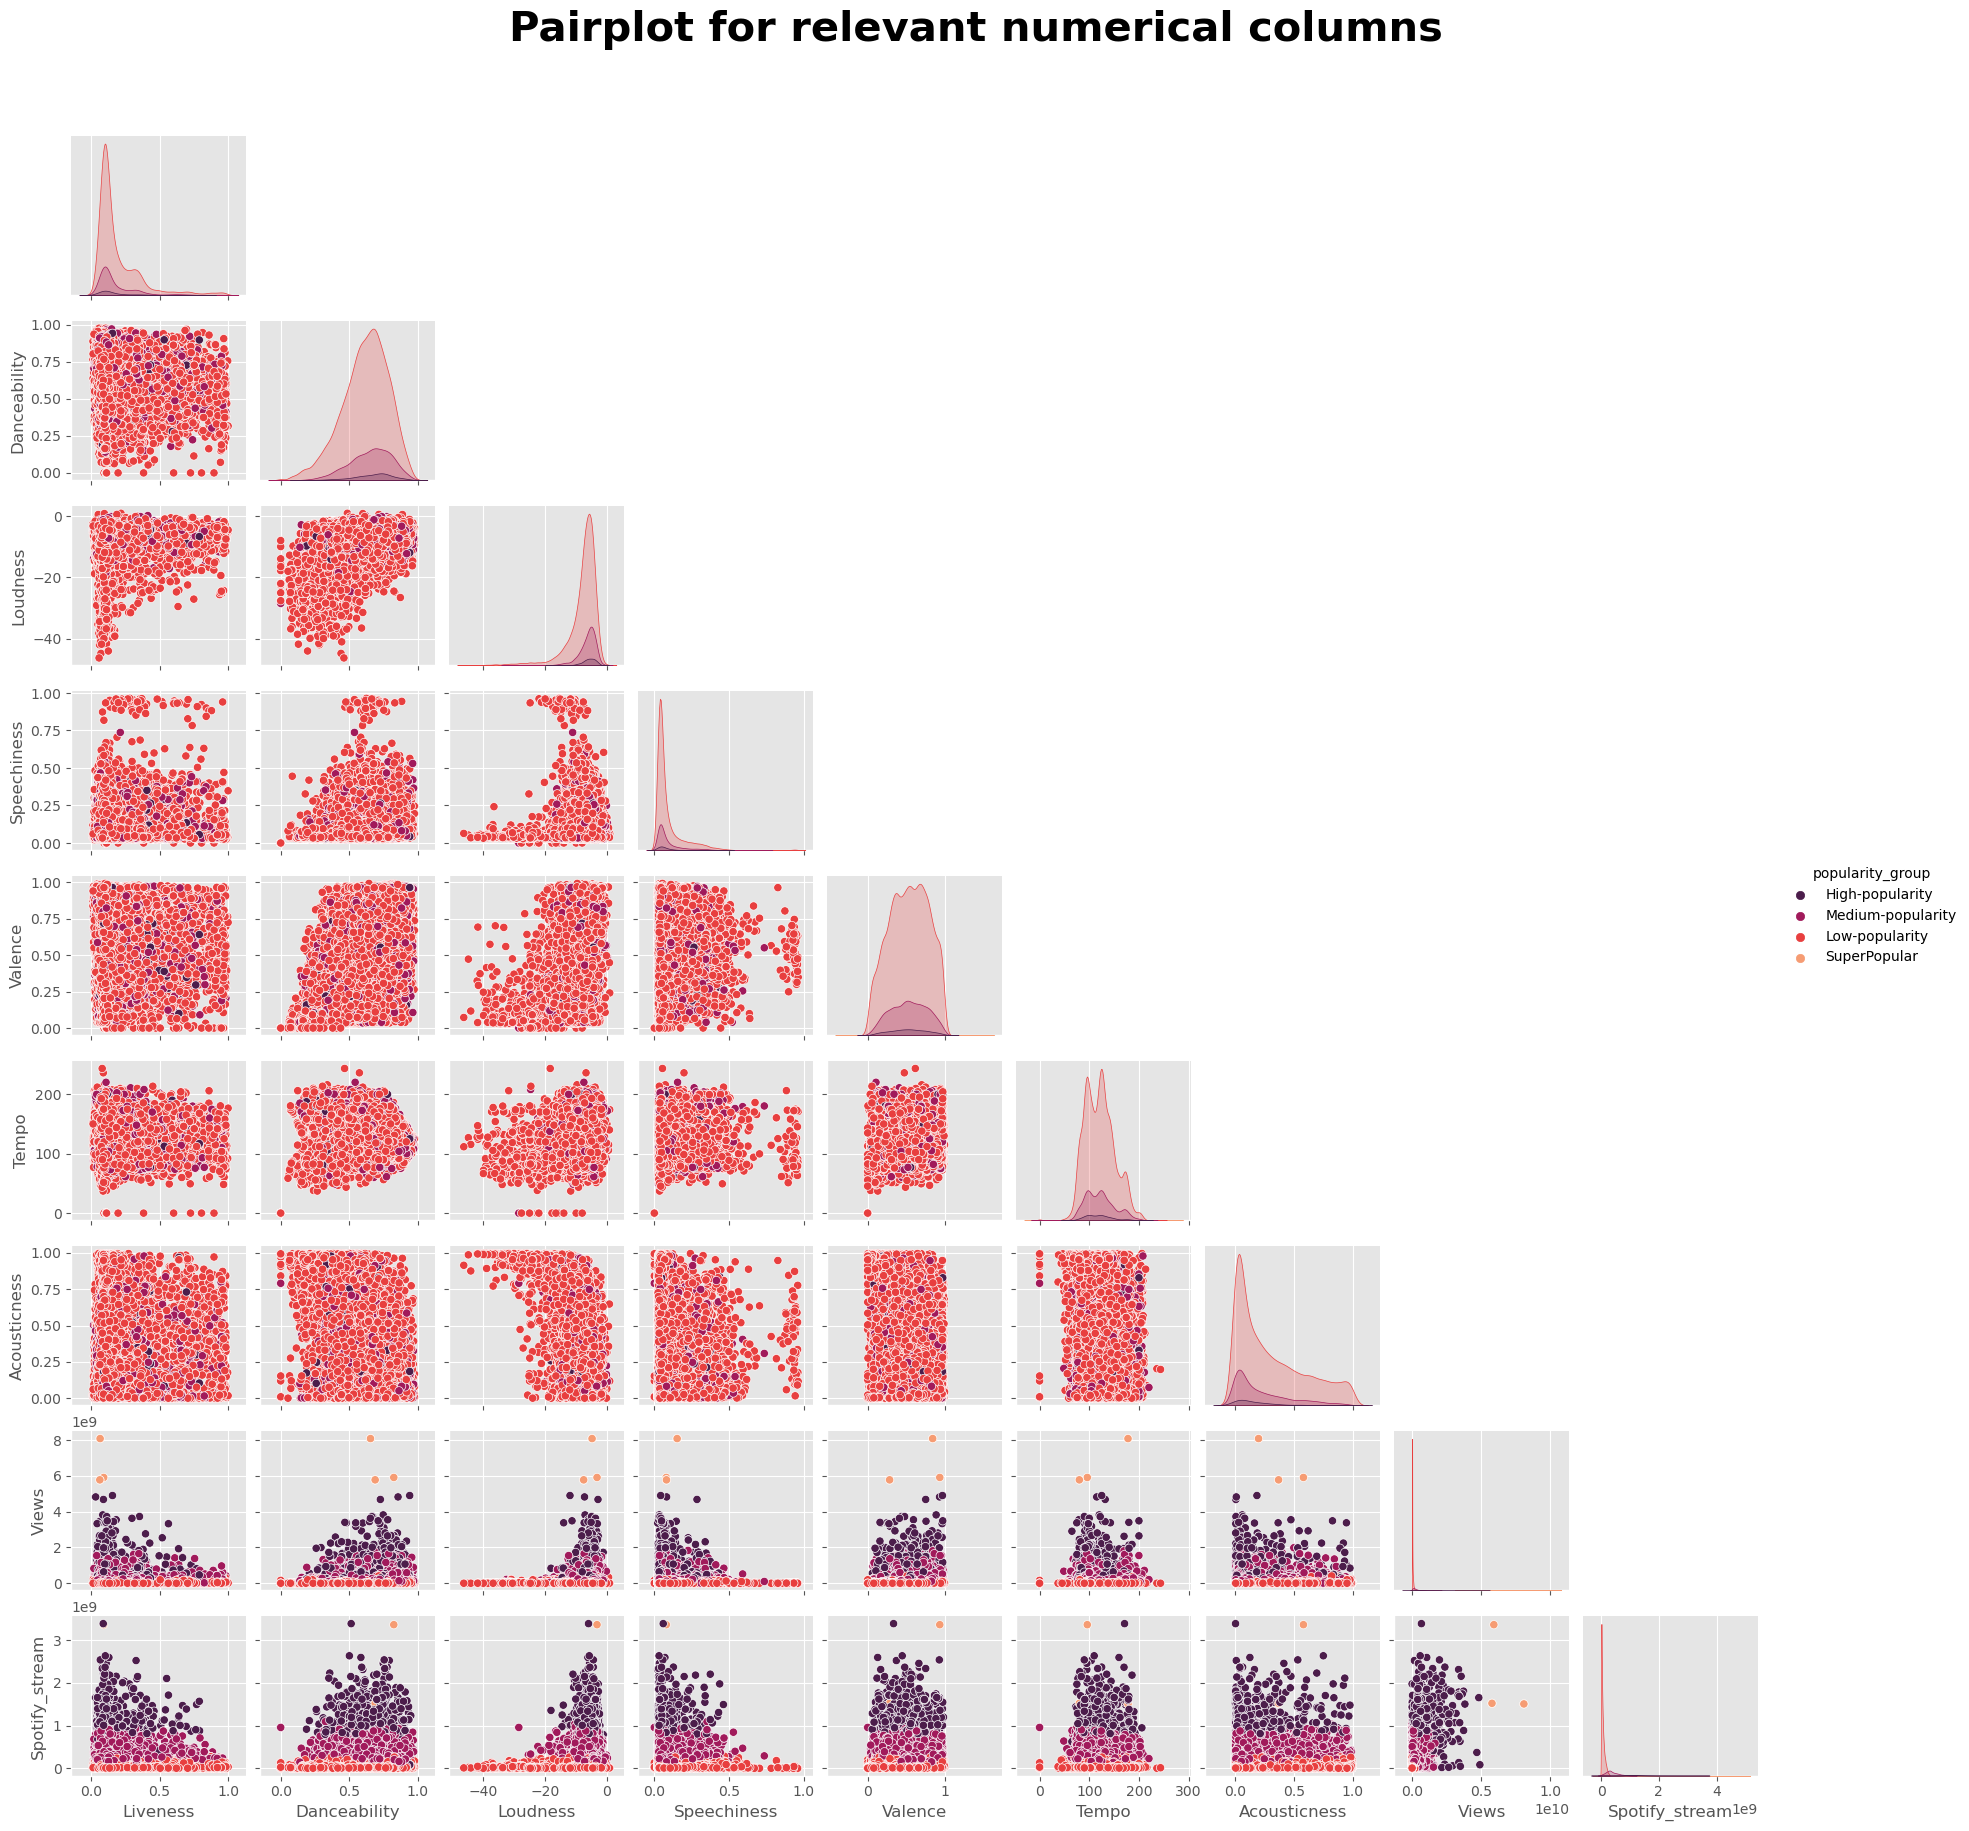

In [37]:
#Pairplot for relevant numerical columns - Data is beautiful :)
ax = sns.pairplot(df_completed, vars=['Liveness','Danceability',
                       'Loudness', 'Speechiness','Valence', 'Tempo', 'Acousticness', 'Views', 'Spotify_stream']
             ,hue='popularity_group', palette='rocket',kind='scatter', diag_kind='kde', height=2, corner=True,)
ax.fig.suptitle('Pairplot for relevant numerical columns', y=1.02, fontsize=30, fontweight='bold', ha='center')
ax.fig.subplots_adjust(top=0.95)
ax.fig.show()
plt.show()

In [38]:
#Correlation matrix dataframe
df_corr = df[['Liveness','Danceability',
                       'Loudness',
                       'Speechiness',
                       'Valence',
                       'Tempo',
                       'Acousticness',
                       'Views',
                       'Spotify_stream']].dropna().corr().round(2)

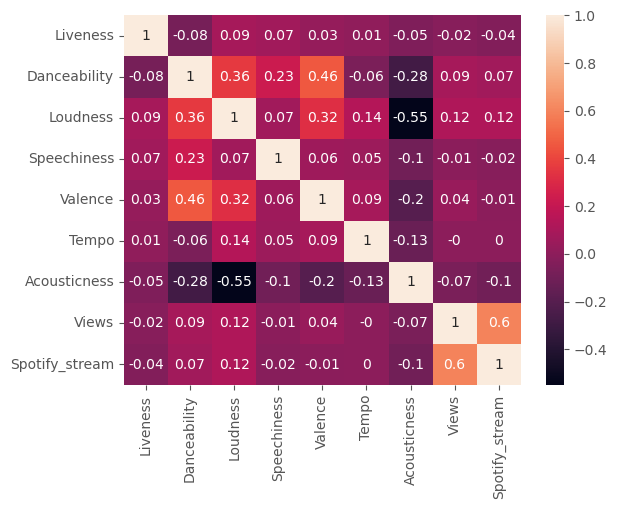

In [39]:
#Correlation matrix heatmap using seaborn
sns.heatmap(df_corr, annot=True)
plt.show()

# 4. Modeling

## 4.1 Feature Selection 


 Considerations for Feature Selection
- `Relevance` : How relevant is the feature to the target variable
- `Redundancy` : How much information does this feature provide that is not already provided by other features
- `Irrelevance` : How much noise does this feature add to the data

In [40]:
df_completed.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,Official_video,Spotify_stream,popularity_cluster,popularity_group
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,2,High-popularity
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,0,Medium-popularity
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,8435055.0,282142.0,7399.0,True,True,6.306347e+07,3,Low-popularity
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,0,Medium-popularity
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,4,Medium-popularity


In [41]:
#Lets drop the columns that are not relevant for the model
df_completed = df_completed.drop(['Artist', 'Album', 'Track', 'popularity_cluster','Views','Likes','Comments','Spotify_stream'], axis=1)
df_completed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19549 entries, 0 to 20717
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Album_type        19549 non-null  object 
 1   Danceability      19549 non-null  float64
 2   Energy            19549 non-null  float64
 3   Key               19549 non-null  float64
 4   Loudness          19549 non-null  float64
 5   Speechiness       19549 non-null  float64
 6   Acousticness      19549 non-null  float64
 7   Instrumentalness  19549 non-null  float64
 8   Liveness          19549 non-null  float64
 9   Valence           19549 non-null  float64
 10  Tempo             19549 non-null  float64
 11  Duration_ms       19549 non-null  float64
 12  Licensed          19549 non-null  bool   
 13  Official_video    19549 non-null  bool   
 14  popularity_group  19549 non-null  object 
dtypes: bool(2), float64(11), object(2)
memory usage: 2.6+ MB


In [42]:
#Lets encode Album type , add it to the df and drop original column afterwards
df_encoded = pd.get_dummies(df_completed['Album_type'], prefix='Album')

#Concatenate the encoded columns to the dataframe
df_completed = pd.concat([df_completed, df_encoded], axis=1)

#Drop the original column
df_completed = df_completed.drop('Album_type', axis=1)

In [43]:
df_completed.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Album_album,Album_compilation,Album_single
count,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,1.954900e+04,19549.000000,19549.000000,19549.000000
mean,0.621059,0.635170,5.294337,-7.633179,0.095392,0.289106,0.055292,0.191226,0.528950,120.605702,2.246281e+05,0.723720,0.036421,0.239859
std,0.165489,0.213555,3.579338,4.618839,0.106243,0.285908,0.192519,0.165197,0.245228,29.619340,1.269126e+05,0.447168,0.187341,0.427008
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000,0.000000,0.000000
25%,0.519000,0.508000,2.000000,-8.772000,0.035700,0.044400,0.000000,0.094000,0.339000,96.990000,1.802400e+05,0.000000,0.000000,0.000000
50%,0.639000,0.666000,5.000000,-6.516000,0.050700,0.190000,0.000002,0.125000,0.536000,119.964000,2.132530e+05,1.000000,0.000000,0.000000
75%,0.742000,0.797000,8.000000,-4.929000,0.104000,0.470000,0.000433,0.234000,0.725000,139.951000,2.519200e+05,1.000000,0.000000,0.000000
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,1.000000,1.000000,1.000000


In [44]:
#Feature Importance techniques 
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler instance
scaler = RobustScaler()

# Select the numeric columns
numeric_cols = df_completed.select_dtypes(include=np.number).columns

# Apply Scaling to the numeric columns 
df_completed[numeric_cols] = scaler.fit_transform(df_completed[numeric_cols])
df_completed.head()

# Extract the features and target variables
X = df_completed.drop('popularity_group', axis=1)
y = df_completed['popularity_group']

# Calculate the mutual information score for each feature and the target
information_gain = SelectKBest(score_func=mutual_info_classif, k='all')
information_gain.fit(X, y)
information_gain_scores = information_gain.scores_

#Chi2 and Correlation are not suitable as the target variable is not continuous, the features are not categorical and some are not even ordinal

# Create a DataFrame with the feature names and information gain scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Information Gain': information_gain_scores
})

# Sort the DataFrame by information gain score from high to low
feature_scores = feature_scores.sort_values(by='Information Gain', ascending=False)
print(feature_scores.head())


           Feature  Information Gain
10     Duration_ms          0.047616
3         Loudness          0.041809
9            Tempo          0.036130
5     Acousticness          0.029957
12  Official_video          0.019806


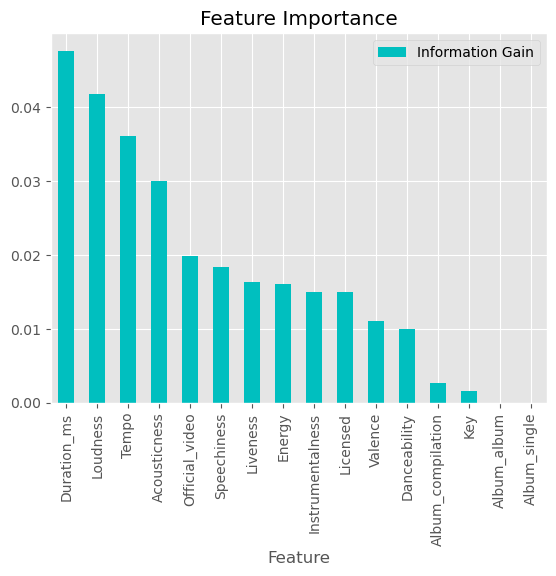

In [45]:
# Create a bar plot of the feature importances
feature_scores.plot(x='Feature', y='Information Gain', kind='bar', color='c')
plt.title('Feature Importance')
plt.show()

In [46]:
#Lets drop the columns that are not relevant for the model and leave key as its part of the song main features. 
#df_completed = df_completed.drop(['Album_compilation', 'Album_album'], axis=1)

#I Have comented this part as the XgBoost is capable to interact with the minor changes on this features. 

## 4.2. Model Selection and Evaluation

As the target variable is categorical let's try with 3 different models: 
- Logistic Regression
- XGBoost
- SVM

In [47]:
df_completed.groupby('popularity_group').count()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Licensed,Official_video,Album_album,Album_compilation,Album_single
popularity_group,,,,,,,,,,,,,,,,
High-popularity,544,544,544,544,544,544,544,544,544,544,544,544,544,544,544,544
Low-popularity,15795,15795,15795,15795,15795,15795,15795,15795,15795,15795,15795,15795,15795,15795,15795,15795
Medium-popularity,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205
SuperPopular,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [48]:
# Import libraries for modeling 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE


In [49]:
# Preprocessing
encoder = LabelEncoder()
y = encoder.fit_transform(df_completed['popularity_group'])

In [50]:
# Divide the data into training and test sets with  SMOTE - k_neighbors=4 is set to include super popular as this just have 5 songs
smote = SMOTE(k_neighbors=4)
X_sm, y_sm = smote.fit_resample(X, y)

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [51]:
# Train a Logistic Regression model
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(X_train_sm, y_train_sm)
lr_preds = lr.predict(X_test_sm)

# Evaluate the model
print("Logistic Regression")
print(classification_report(y_test_sm, lr_preds))

Logistic Regression
              precision    recall  f1-score   support

           0       0.48      0.62      0.54      3152
           1       0.61      0.49      0.55      3125
           2       0.41      0.24      0.30      3226
           3       0.74      1.00      0.85      3133

    accuracy                           0.58     12636
   macro avg       0.56      0.59      0.56     12636
weighted avg       0.56      0.58      0.56     12636



In [52]:
#Train a SVM model
svm = SVC(decision_function_shape='ovo')
svm.fit(X_train_sm, y_train_sm)
svm_preds = svm.predict(X_test_sm)

# Evaluate the model
print("SVM")
print(classification_report(y_test_sm, svm_preds))

SVM
              precision    recall  f1-score   support

           0       0.29      0.08      0.12      3152
           1       0.59      0.15      0.24      3125
           2       0.32      0.01      0.01      3226
           3       0.29      1.00      0.44      3133

    accuracy                           0.31     12636
   macro avg       0.37      0.31      0.20     12636
weighted avg       0.37      0.31      0.20     12636



In [53]:
# Train a XGBoost model with RandomizedSearchCV
xgb = XGBClassifier(objective='multi:softmax')

# Define hyperparameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'n_estimators' : [100, 200, 500],
    'objective': ['multi:softmax']
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, param_grid, cv=3, scoring='accuracy')
random_search.fit(X_train_sm, y_train_sm)

# Best hyperparameters
print(random_search.best_params_)

# Predictions with the best model
xgb_preds = random_search.predict(X_test_sm)

# Evaluate the model
print("XGBoost with RandomizedSearchCV")
print(classification_report(y_test_sm, xgb_preds))


{'subsample': 1.0, 'objective': 'multi:softmax', 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
XGBoost with RandomizedSearchCV
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3152
           1       0.88      0.94      0.91      3125
           2       0.94      0.86      0.90      3226
           3       1.00      1.00      1.00      3133

    accuracy                           0.95     12636
   macro avg       0.95      0.95      0.95     12636
weighted avg       0.95      0.95      0.95     12636



#### Based on the result we can clearly see that XGBoost is the winner, so lets keep working from there.

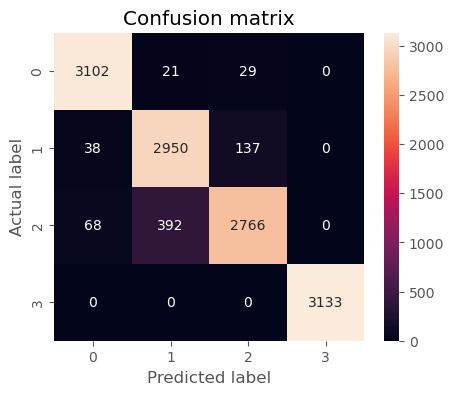

In [54]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm = confusion_matrix(y_test_sm, xgb_preds)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


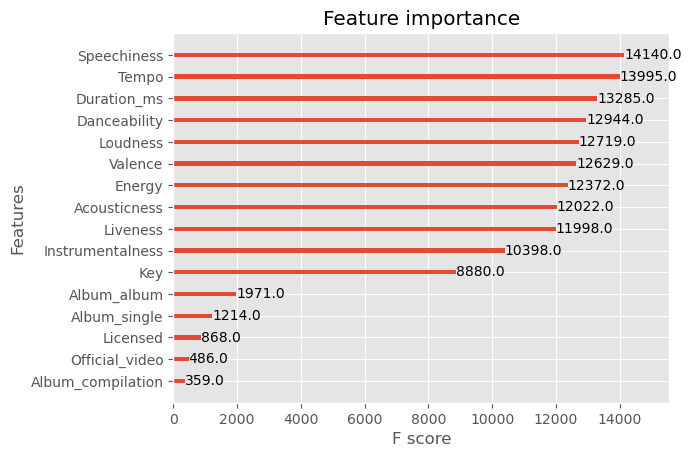

In [55]:
# Plot feature importance
from xgboost import plot_importance
plot_importance(random_search.best_estimator_)
plt.show()


In [56]:
# Variables used to train the model
train_features = X_train_sm.columns.tolist()
train_features

['Danceability',
 'Energy',
 'Key',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo',
 'Duration_ms',
 'Licensed',
 'Official_video',
 'Album_album',
 'Album_compilation',
 'Album_single']

In [57]:
#Lets Prepare our full dataset for teh Model
#Lets encode Album type , add it to the df and drop original column afterwards
df_encoded = pd.get_dummies(df_completed_all_columns['Album_type'], prefix='Album')

#Concatenate the encoded columns to the dataframe
df_completed = pd.concat([df_completed_all_columns, df_encoded], axis=1)

df_completed.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,Official_video,Spotify_stream,popularity_cluster,popularity_group,Album_album,Album_compilation,Album_single
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,2,High-popularity,1,0,0
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,0,Medium-popularity,1,0,0
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,8435055.0,282142.0,7399.0,True,True,6.306347e+07,3,Low-popularity,0,0,1
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,0,Medium-popularity,1,0,0
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,4,Medium-popularity,1,0,0


In [58]:
# Make predictions on the full dataset with XGBoost

index_error_count = 0

try:
    # Get probabilities for each class
    probabilities = random_search.best_estimator_.predict_proba(df_completed[train_features])

    # Add probabilities to the full dataset and print the head 
    for i, class_name in enumerate(encoder.classes_):
        try:
            df_completed_all_columns[f'Probability_{class_name}'] = probabilities[:, i]
        except IndexError:
            index_error_count += 1
            df_completed_all_columns[f'Probability_{class_name}'] = 'NA'
    
    
    
except Exception as e:
    print("Error occurred: ", e)
    print("Se encontró un error durante la predicción. Asegúrese de que su modelo esté correctamente entrenado y que los datos de entrada sean válidos.")

print(f"Total index errors: {index_error_count}")


Total index errors: 0


In [59]:
#Quick check of the outputs
df_completed_all_columns.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,Official_video,Spotify_stream,popularity_cluster,popularity_group,Probability_High-popularity,Probability_Low-popularity,Probability_Medium-popularity,Probability_SuperPopular
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,2,High-popularity,0.001739,0.961439,0.036811,0.000011
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,0,Medium-popularity,0.002828,0.983088,0.014074,0.000011
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,8435055.0,282142.0,7399.0,True,True,6.306347e+07,3,Low-popularity,0.005581,0.986934,0.007476,0.000008
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,0,Medium-popularity,0.001333,0.992851,0.005813,0.000004
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,4,Medium-popularity,0.002028,0.984108,0.013854,0.000010


In [60]:
#I should have created this column a while ago ...
df_completed_all_columns['Track_Artist'] = df_completed_all_columns['Track'] + "_" + df_completed_all_columns['Artist']


#### Top 10 Mid popularity songs with a popability to be High popular

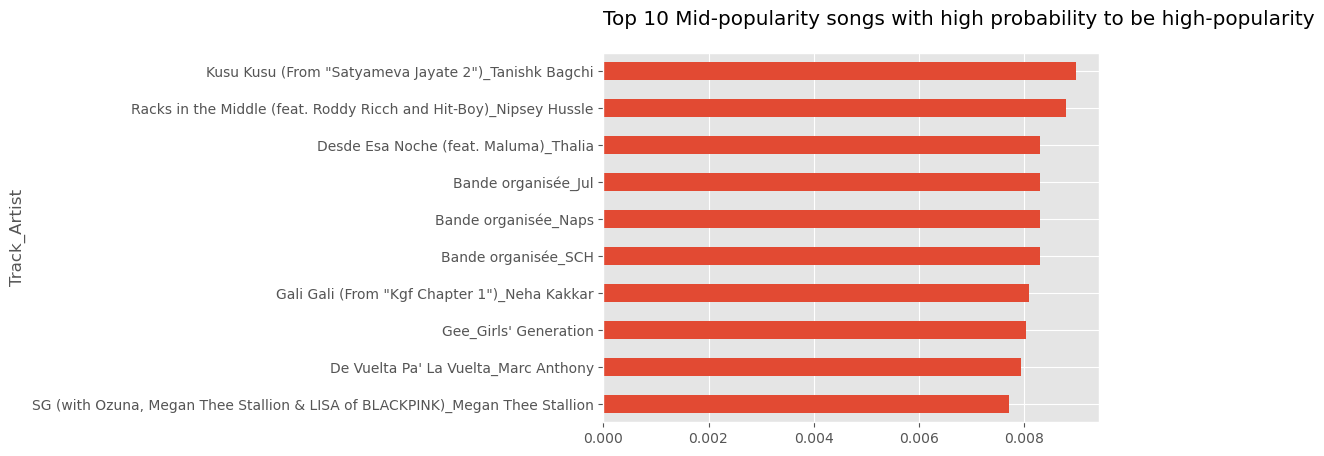

In [61]:
ax = df_completed_all_columns[(df_completed_all_columns['popularity_group'] == 'Medium-popularity') 
                         & (df_completed_all_columns['Probability_High-popularity'] > 0)].sort_values(
                             by='Probability_High-popularity', ascending=False).head(10).plot.barh(x='Track_Artist', y='Probability_High-popularity', legend=False)
ax.set_title('Top 10 Mid-popularity songs with high probability to be high-popularity', pad=20, loc='left')
ax.invert_yaxis()
plt.show()

In [62]:
#Save the dataframe used to train the model to compare new  DS when transforming new datasets (Just for validation)
df_completed.to_csv('df_completed_used_for_train.csv', index=False)

In [63]:
# Save the data to a csv file
df_completed_all_columns.to_csv('spotify_youtube_df_completed_with_predictions.csv', index=False)

In [64]:
# Save the best model
from joblib import dump
dump(random_search.best_estimator_, 'xgboost_model.joblib')


['xgboost_model.joblib']

In [65]:
# Save encoder for target variable
dump(encoder, 'label_encoder.joblib')


['label_encoder.joblib']

In [66]:
#Lets create a pre-processor pipeline to use in new data
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder

# Store by feature type
numeric_features = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms']
categorical_features = ['Album_type']
boolean_features = ['Licensed', 'Official_video']

#Build preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
#We don't need to do anything for boolean features


#Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('bool', 'passthrough', boolean_features)])

# Save the preprocessing pipeline
joblib.dump(preprocessor, 'preprocessor.pkl')



['preprocessor.pkl']

# 5. Key Learnings and Conclusions

## About the Data & Output

Music is beautiful; it has the power to transport us to different moments and places. It plays an important role alongside our sense of hearing and long-term memory.

**Artist**
- Ed Sheeran really knows how to make good music!
- Two out of the top 10 artists are Hispanic performers.
- CoComelon is a reference in children's music, worth exploring if you want to delve into this genre.

**Songs**
- "Despacito" is a worldwide case study as it has a melodic composition that plays interestingly with our brains. It is lively, simple, repetitive, and has a catchy rhythm.

**Factors that seem to make songs more or less popular**
In this part of the exercise, I like to use a [table](#Quick-table-view-by-popularity-cluster) to identify values and complement the analysis with a [radar diagram](#3.2.-Multi-variate-Analysis) that provides a more standardized and comparative visual (inspired by video games)(I'm checking why sometimes it's displayed and sometimes is not).

- Instrumentalness decreases as the popularity group increases, indicating that popular songs tend to have more vocal elements.
- Loudness levels decrease as the popularity group increases, suggesting a more balanced volume in popular songs.
- Danceability shows a notable trend, indicating that more popular songs tend to have higher danceability, potentially appealing to a larger audience.

**And the predictions?**
This exercise not only gives us a visual understanding of the probability of a song's popularity but also provides initial insights on how current songs can work on strategies to "increase" their popularity tier.

- Duration_ms, Loudness, and Tempo are among the top 3 representative variables for our model to identify which popularity group a song could belong to.

- If we zoom out of the exercise and recognize that there are more variables involved in the process of popularizing a song that we might not be considering, we could take this [top 10 songs](#Top-10-Mid-popularity-songs-with-a-popability-to-be-High-popular) and implement a boosting marketing strategy.

- If you're an artist looking to release a new song, how about first looking at existing songs with a similar flow and creating playlists with the most popular ones to enter the market?

**What other strategies can you think of?** Post them in the comments.

### Limitations and Considerations:
This analysis may include certain biases and uncertainties as we do not know what other factors may be influencing the popularity of these songs. Let's consider factors such as language, wording of the lyrics, the music producer, as well as other elements like undersampling or oversampling of certain types of popular songs.

# 6. References

- [CrispDM](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining)
- [Data Profiling](https://github.com/ydataai/ydata-profiling)
- [Imbalanced clasification](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)
- [Music and the Brain: The Science Behind Your Favorite Songs](https://fssfalcon.org/5744/news/music-and-the-brain-the-science-behind-your-favorite-songs/)